In [1]:
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
E23df = pd.read_csv('E23 Mapped Dust Outputs/E23_Master_DF.csv')

fitcoord_df = pd.read_csv('fitcoord csvs/codark_fulldf_I.csv')
fitcoord_df = fitcoord_df[fitcoord_df["comp"] != 3]
fitcoord_df = fitcoord_df.sort_values(by="l (deg)", ascending=True)
E23df = E23df.sort_values(by="l [deg]", ascending=True)

# Scale to match E23 degrees if your fitcoord file stores l,b as integers
fitcoord_df['l_scaled'] = fitcoord_df['l (deg)'] / 1000
fitcoord_df['b_scaled'] = fitcoord_df['b (deg)'] / 100

merged_df_E23 = pd.merge(
    fitcoord_df,
    E23df[
        [
            'l [deg]',
            'b [deg]',
            'Total A_V [mag]',
            'Total A_G [mag]',
            'Distance to Peak',
            'FWHM (V Band) [pc]',
            'Column Density [cm^-2]',
            'V Band Volume Density [cm^-3]',
            'G Band Volume Density [cm^-3]',
            'V Band Volume Density STD',
            'G Band Volume Density Std',
            'N(H) from A_G [cm^-2]',
            'G Band Volume Density SDOM'
            
        ]
    ],
    left_on=['l_scaled', 'b_scaled'],
    right_on=['l [deg]', 'b [deg]'],
    how='left'
)

# Drop only helper columns you don't want
merged_df_E23 = merged_df_E23.drop(columns=['l_scaled', 'b_scaled'])

# Optional: move l,b columns to the front, keep everything else intact
cols = ['l [deg]', 'b [deg]'] + [c for c in merged_df_E23.columns if c not in ['l [deg]', 'b [deg]']]
merged_df_E23 = merged_df_E23[cols]

In [3]:
merged_df_E23

,l [deg],b [deg],l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),...,Total A_G [mag],Distance to Peak,FWHM (V Band) [pc],Column Density [cm^-2],V Band Volume Density [cm^-3],G Band Volume Density [cm^-3],V Band Volume Density STD,G Band Volume Density Std,N(H) from A_G [cm^-2],G Band Volume Density SDOM
0,119.07,28.00,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
1,119.07,28.00,119070,2800,65,2,0.002658,0.134199,-4.358241,0.218256,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
2,119.07,28.00,119070,2800,CO,1,1.613065,0.125558,-3.779779,0.077823,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
3,119.07,28.00,119070,2800,CO,2,0.147463,0.134199,-4.251790,0.218256,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
4,119.07,28.00,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,156.54,35.13,156540,3513,65,1,0.006454,0.002316,0.436334,0.710690,...,0.264022,391.416309,13.471766,2.851906e+21,68.605679,436.429096,5.076979,32.133695,6.600561e+20,9.276199
188,156.64,32.50,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,8.498344,26.325936,3.776740e+20,7.599643
189,156.64,32.50,156640,3250,67,1,0.005350,4.088013,-0.657100,51.949659,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,8.498344,26.325936,3.776740e+20,7.599643
190,156.64,32.50,156640,3250,65,1,0.002425,0.001370,0.949288,2.455072,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,8.498344,26.325936,3.776740e+20,7.599643


In [4]:
# Read
E23df = pd.read_csv('E23 Mapped Dust Outputs/E23_Master_DF.csv')
fitcoord_df = pd.read_csv('fitcoord csvs/codark_fulldf_I.csv')

# 1) Clean column names to avoid invisible mismatches
E23df.columns = E23df.columns.str.strip()
fitcoord_df.columns = fitcoord_df.columns.str.strip()

# 2) Filter/prepare fitcoord_df
fitcoord_df = fitcoord_df[fitcoord_df["comp"] != 3].sort_values(by="l (deg)")
fitcoord_df['l_scaled'] = fitcoord_df['l (deg)'] / 1000
fitcoord_df['b_scaled'] = fitcoord_df['b (deg)'] / 100

# 3) Prepare E23 columns (adjust these names to exactly match your file)
keep_cols_e23 = [
            'l [deg]',
            'b [deg]',
            'Total A_V [mag]',
            'Total A_G [mag]',
            'Distance to Peak',
            'FWHM (V Band) [pc]',
            'Column Density [cm^-2]',
            'V Band Volume Density [cm^-3]',
            'G Band Volume Density [cm^-3]',
            'V Band Volume Density STD',
            'G Band Volume Density Std',
            'N(H) from A_G [cm^-2]',
            'G Band Volume Density SDOM'
]
missing_e23 = [c for c in keep_cols_e23 if c not in E23df.columns]
if missing_e23:
    print("WARNING: These E23 columns were not found:", missing_e23)

E23_trim = E23df[[c for c in keep_cols_e23 if c in E23df.columns]].copy()

# 4) Merge with explicit suffixes so overlaps are visible, and validate shape
merged_df_E23 = pd.merge(
    fitcoord_df,
    E23_trim,
    left_on=['l_scaled', 'b_scaled'],
    right_on=['l [deg]', 'b [deg]'],
    how='left',
    suffixes=('_fit', '_E23'),
    validate='many_to_one'  # optional, helpful if you expect each (l,b) to match at most one E23 row
)

# 5) Drop only helper columns used for merging (keep original fitcoord columns like 'cloud', 'Upper Limit')
merged_df_E23 = merged_df_E23.drop(columns=['l_scaled', 'b_scaled'])

# 6) (Optional) Move E23 coordinates to the front for readability
front = ['l [deg]', 'b [deg]']
front = [c for c in front if c in merged_df_E23.columns]
merged_df_E23 = merged_df_E23[front + [c for c in merged_df_E23.columns if c not in front]]

merged_df_E23

,l [deg],b [deg],l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),...,Total A_G [mag],Distance to Peak,FWHM (V Band) [pc],Column Density [cm^-2],V Band Volume Density [cm^-3],G Band Volume Density [cm^-3],V Band Volume Density STD,G Band Volume Density Std,N(H) from A_G [cm^-2],G Band Volume Density SDOM
0,119.07,28.00,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
1,119.07,28.00,119070,2800,65,2,0.002658,0.134199,-4.358241,0.218256,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
2,119.07,28.00,119070,2800,CO,1,1.613065,0.125558,-3.779779,0.077823,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
3,119.07,28.00,119070,2800,CO,2,0.147463,0.134199,-4.251790,0.218256,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
4,119.07,28.00,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,6.760820,40.479843,9.023714e+20,11.685524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,156.54,35.13,156540,3513,65,1,0.006454,0.002316,0.436334,0.710690,...,0.264022,391.416309,13.471766,2.851906e+21,68.605679,436.429096,5.076979,32.133695,6.600561e+20,9.276199
188,156.64,32.50,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,8.498344,26.325936,3.776740e+20,7.599643
189,156.64,32.50,156640,3250,67,1,0.005350,4.088013,-0.657100,51.949659,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,8.498344,26.325936,3.776740e+20,7.599643
190,156.64,32.50,156640,3250,65,1,0.002425,0.001370,0.949288,2.455072,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,8.498344,26.325936,3.776740e+20,7.599643


In [5]:
# Read
E23df = pd.read_csv('E23 Mapped Dust Outputs/E23_Master_DF.csv')
fitcoord_df = pd.read_csv('fitcoord csvs/codark_fulldf_I.csv')

# Clean column names
E23df.columns = E23df.columns.str.strip()
fitcoord_df.columns = fitcoord_df.columns.str.strip()

# Filter fitcoord
fitcoord_df = fitcoord_df[fitcoord_df["comp"] != 3].sort_values(by="l (deg)")
fitcoord_df['l_scaled'] = fitcoord_df['l (deg)'] / 1000
fitcoord_df['b_scaled'] = fitcoord_df['b (deg)'] / 100

# Merge the *entirety* of both frames
merged_df_E23 = pd.merge(
    fitcoord_df,
    E23df,   # no sub-selection → all columns kept
    left_on=['l_scaled', 'b_scaled'],
    right_on=['l [deg]', 'b [deg]'],
    how='left',
    suffixes=('_fit', '_E23')  # if columns share names, you’ll see _fit and _E23
)

# Drop helper columns if you don’t need them
merged_df_E23 = merged_df_E23.drop(columns=['l_scaled', 'b_scaled'])
df_no_upper = merged_df_E23[merged_df_E23['Upper Limit'] != 'T'].copy()

print(merged_df_E23.columns.tolist())
merged_df_E23

['l (deg)', 'b (deg)', 'line', 'comp', 'T_peak (K)', 'T_error (K)', 'CenterVel (km/s)', 'CenterVel_error (km/s)', 'FWHM (km/s)', 'FWHM error (km/s)', 'integral', 'integral error', 'Cloud', 'Upper Limit', 'l [deg]', 'b [deg]', 'Total A_V [mag]', 'Total A_G [mag]', 'Distance to Peak', 'FWHM (V Band) [pc]', 'Column Density [cm^-2]', 'V Band Volume Density [cm^-3]', 'G Band Volume Density [cm^-3]', 'N(H) from A_G [cm^-2]', 'G Band Volume Density Std', 'G Band Volume Density SDOM', 'V Band Volume Density STD']


,l (deg),b (deg),line,comp,T_peak (K),T_error (K),CenterVel (km/s),CenterVel_error (km/s),FWHM (km/s),FWHM error (km/s),...,Total A_G [mag],Distance to Peak,FWHM (V Band) [pc],Column Density [cm^-2],V Band Volume Density [cm^-3],G Band Volume Density [cm^-3],N(H) from A_G [cm^-2],G Band Volume Density Std,G Band Volume Density SDOM,V Band Volume Density STD
0,119070,2800,65,1,0.043520,0.002556,-4.251790,0.073304,1.081164,0.073336,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,9.023714e+20,40.479843,11.685524,6.760820
1,119070,2800,65,2,0.002658,0.134199,-4.358241,0.218256,1.103239,0.200721,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,9.023714e+20,40.479843,11.685524,6.760820
2,119070,2800,CO,1,1.613065,0.125558,-3.779779,0.077823,0.865799,0.077823,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,9.023714e+20,40.479843,11.685524,6.760820
3,119070,2800,CO,2,0.147463,0.134199,-4.251790,0.218256,1.081164,0.200721,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,9.023714e+20,40.479843,11.685524,6.760820
4,119070,2800,HI,1,25.108944,0.262239,-4.629767,0.021005,1.847756,0.024123,...,0.360949,357.367668,10.407418,3.898878e+21,121.407654,596.647957,9.023714e+20,40.479843,11.685524,6.760820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,156540,3513,65,1,0.006454,0.002316,0.436334,0.710690,1.418376,0.786095,...,0.264022,391.416309,13.471766,2.851906e+21,68.605679,436.429096,6.600561e+20,32.133695,9.276199,5.076979
188,156640,3250,HI,1,23.456820,0.679447,-0.742946,0.095651,2.861469,0.095685,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,3.776740e+20,26.325936,7.599643,8.498344
189,156640,3250,67,1,0.005350,4.088013,-0.657100,51.949659,0.303745,102.735789,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,3.776740e+20,26.325936,7.599643,8.498344
190,156640,3250,65,1,0.002425,0.001370,0.949288,2.455072,3.763955,2.455072,...,0.151070,399.427754,6.889500,1.631817e+21,76.759668,249.718041,3.776740e+20,26.325936,7.599643,8.498344


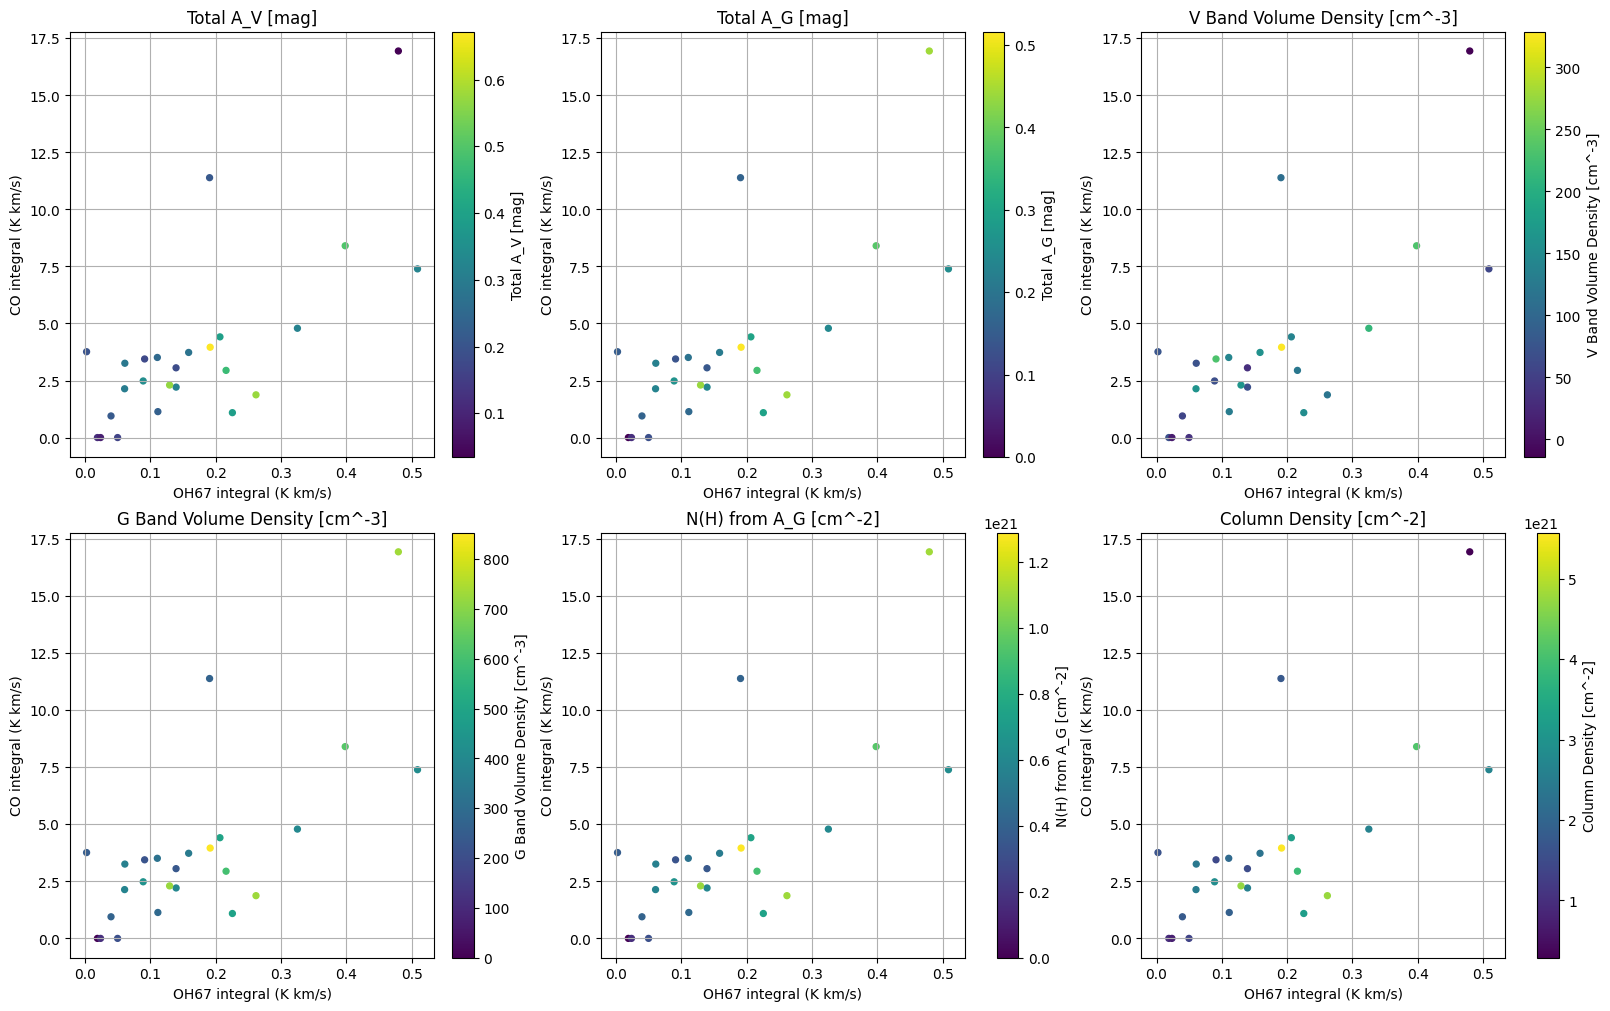

In [6]:
df = df_no_upper.copy()
df.columns = df.columns.str.strip()
df['line'] = df['line'].astype(str).str.strip()

# 1) Select integrals for OH67 and CO, sum over components if duplicates exist
sel = df['line'].isin(['67', 'CO'])
agg = (df.loc[sel, ['l [deg]', 'b [deg]', 'line', 'integral']]
         .groupby(['l [deg]', 'b [deg]', 'line'], as_index=False)['integral']
         .sum())

pair = (agg.pivot(index=['l [deg]', 'b [deg]'], columns='line', values='integral')
            .dropna(subset=['67', 'CO'])
            .reset_index())

# 2) Colorbar metadata columns
color_cols = [
    'Total A_V [mag]',
    'Total A_G [mag]',
    'V Band Volume Density [cm^-3]',
    'G Band Volume Density [cm^-3]',
    'N(H) from A_G [cm^-2]',
    'Column Density [cm^-2]',
]

meta = df[['l [deg]', 'b [deg]'] + color_cols].drop_duplicates(subset=['l [deg]', 'b [deg]'])
data = pair.merge(meta, on=['l [deg]', 'b [deg]'], how='left')

# 3) Plotting
x = data['67']
y = data['CO']

fig, axes = plt.subplots(2, 3, figsize=(16, 10), constrained_layout=True)

for ax, ccol in zip(axes.flatten(), color_cols):
    z = pd.to_numeric(data[ccol], errors='coerce')
    m = np.isfinite(x) & np.isfinite(y) & np.isfinite(z)
    sc = ax.scatter(x[m], y[m], s=18, c=z[m])
    ax.set_xlabel('OH67 integral (K km/s)')
    ax.set_ylabel('CO integral (K km/s)')
    ax.set_title(ccol)
    cb = fig.colorbar(sc, ax=ax)
    cb.ax.set_ylabel(ccol)
    ax.grid(True)


plt.show()

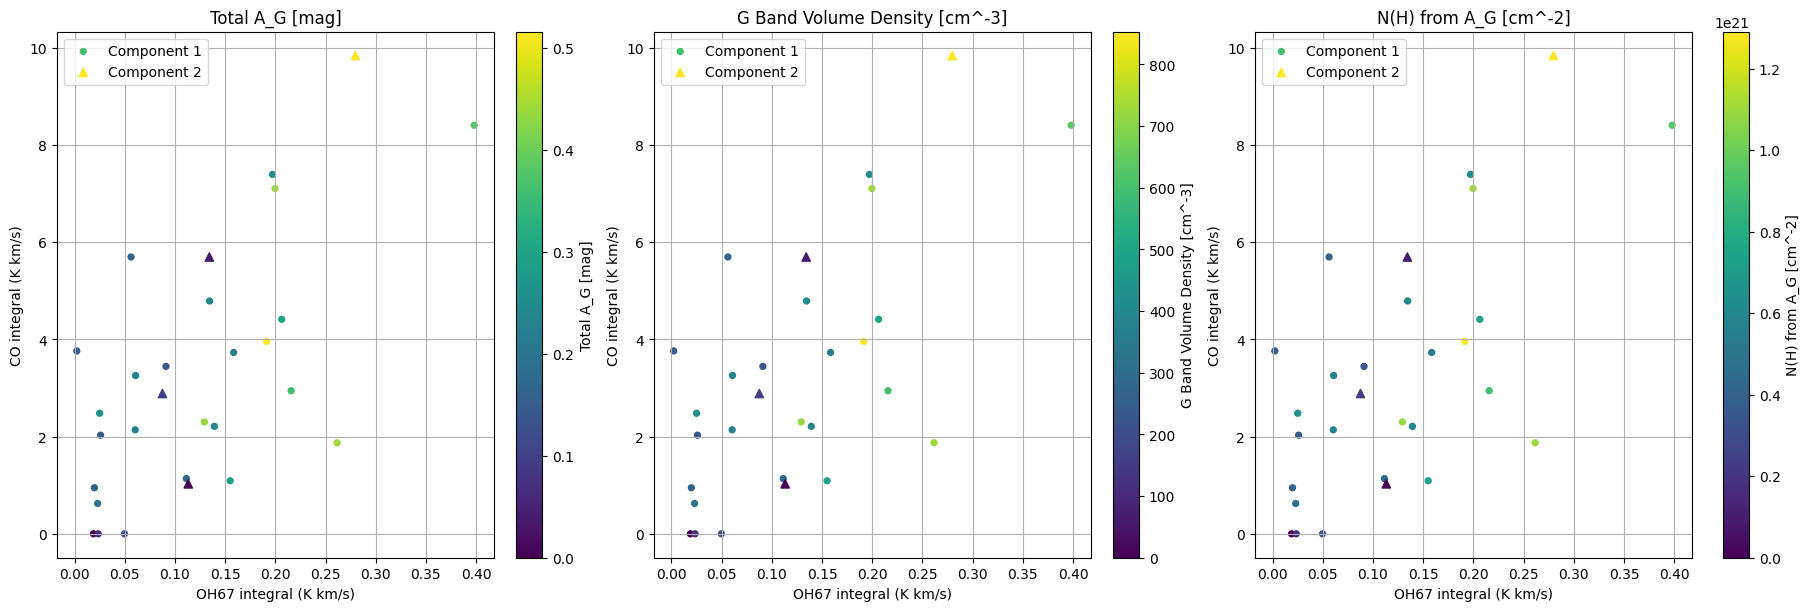

In [11]:
# --- Setup / cleaning ---
df = df_no_upper.copy()
df.columns = df.columns.str.strip()
df['line'] = df['line'].astype(str).str.strip()

# Normalize/clean component column to be 1/2 if it's not already
# (handles values like '1', 1, 'Component 1', etc.)
comp = (df.get('comp', None))
if comp is None:
    raise ValueError("Expected a 'comp' column in df_no_upper.")
df['comp'] = (
    df['comp']
      .astype(str)
      .str.extract(r'(\d+)')   # grab first digit group
      .astype(float)           # to numeric (allows NaN)
)

# --- 1) Select integrals for OH67 and CO, sum over comps if exact duplicates exist ---
sel = df['line'].isin(['67', 'CO'])

# Keep 'comp' in the grouping so we can plot Component 1 vs Component 2 separately
agg = (df.loc[sel, ['l [deg]', 'b [deg]', 'line', 'integral', 'comp']]
         .groupby(['l [deg]', 'b [deg]', 'line', 'comp'], as_index=False)['integral']
         .sum())

def make_pair_for_comp(agg_df, comp_val):
    """Pivot to get a table with columns ['67','CO'] only for a specific component."""
    sub = agg_df[agg_df['comp'] == comp_val]
    if sub.empty:
        return sub.assign(**{'67': [], 'CO': []})  # empty frame
    pair = (sub.pivot(index=['l [deg]', 'b [deg]'], columns='line', values='integral')
               .dropna(subset=['67', 'CO'], how='any')
               .reset_index())
    pair['comp'] = comp_val
    return pair

pair_c1 = make_pair_for_comp(agg, 1.0)
pair_c2 = make_pair_for_comp(agg, 2.0)

# --- 2) Colorbar metadata columns (G-band only, 3 panels) ---
color_cols = [
    'Total A_G [mag]',
    'G Band Volume Density [cm^-3]',
    'N(H) from A_G [cm^-2]',
]

meta = df[['l [deg]', 'b [deg]'] + color_cols].drop_duplicates(subset=['l [deg]', 'b [deg]'])

data_c1 = pair_c1.merge(meta, on=['l [deg]', 'b [deg]'], how='left')
data_c2 = pair_c2.merge(meta, on=['l [deg]', 'b [deg]'], how='left')

# --- 3) Plotting (3 panels) ---
x1, y1 = data_c1['67'], data_c1['CO']
x2, y2 = data_c2['67'], data_c2['CO']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

for ax, ccol in zip(axes, color_cols):
    z1 = pd.to_numeric(data_c1[ccol], errors='coerce')
    z2 = pd.to_numeric(data_c2[ccol], errors='coerce')

    m1 = np.isfinite(x1) & np.isfinite(y1) & np.isfinite(z1)
    m2 = np.isfinite(x2) & np.isfinite(y2) & np.isfinite(z2)

    sc1 = ax.scatter(x1[m1], y1[m1], s=18, c=z1[m1], marker='o', label='Component 1')
    sc2 = ax.scatter(x2[m2], y2[m2], s=36, c=z2[m2], marker='^', label='Component 2')

    cb = fig.colorbar(sc1, ax=ax)
    cb.ax.set_ylabel(ccol)

    ax.set_xlabel('OH67 integral (K km/s)')
    ax.set_ylabel('CO integral (K km/s)')
    ax.set_title(ccol)
    ax.grid(True)
    ax.legend(loc='best')

plt.show()

### Equations (Found from Bolatto 2013, Busch 2024, and Busch 2019):

$$ X_{CO} = \frac{N(H_2)}{(W(CO))} $$

$$N(OH) = C\frac{T_{ex}}{T_{ex}-T_c} \int T_b(\nu)d\nu $$ 

where $ \int T_b(\nu)d\nu $ is WOH.

$$ T_{ex} = 5K, T_c = 3K$$

Median Literature Value for N(OH)/N(H2) Ratio: $$\frac{N_{OH}}{N_{H2}} = 1\times 10^{-7}$$

N(H2) from CO: $$N(H_{2, CO}) = X_{CO}W(CO),$$ note this is the J = 0 to 1 transition. 


We use the XCO Factor for the Milky Way from Busch 2024 (via Bolatto 2013): $$X_{CO} = 2\times 10^{20} cm^{-2}$$



In [13]:
# Strip whitespace & normalize
df['line'] = df['line'].astype(str).str.strip()
df['comp'] = df['comp'].astype(str).str.strip()

# --- OH 1667 integrals and errors ---
WOH67        = df.loc[(df['line'] == '67') & (df['comp'] == '1'), 'integral'].values
WOH67_2nd    = df.loc[(df['line'] == '67') & (df['comp'] == '2'), 'integral'].values

sigWOH67     = df.loc[(df['line'] == '67') & (df['comp'] == '1'), 'integral error'].values
sigWOH67_2nd = df.loc[(df['line'] == '67') & (df['comp'] == '2'), 'integral error'].values

# --- CO (1–0) integrals and errors ---
WCO          = df.loc[(df['line'] == 'CO') & (df['comp'] == '1'), 'integral'].values
WCO_2ndcomp  = df.loc[(df['line'] == 'CO') & (df['comp'] == '2'), 'integral'].values

sigWCO       = df.loc[(df['line'] == 'CO') & (df['comp'] == '1'), 'integral error'].values
sigWCO_2ndcomp = df.loc[(df['line'] == 'CO') & (df['comp'] == '2'), 'integral error'].values

In [14]:
# === Define Constants ===
XCO    = 2 * 10**20     # [cm^-2 / (K km s^-1)]  (Milky Way; CO(1–0))
C1667  = 2.3 * 10**14   # [cm^-2 / (K km s^-1)]  (OH 1667 MHz; brightness-temp form)
# If you later use 1665 MHz explicitly, typical ratio is ~1667:1665 ≈ 1.8:1 in LTE line strengths.
# You can approximate: C1665 ≈ C1667 / 1.8  (verify for your calibration!)
# C1665 = C1667 / 1.8

# === Helpers (vectorized) ===
def NOHfinder(Tex, Tc, WOH):
    """N(OH) = C1667 * Tex/(Tex - Tc) * WOH"""
    Tex = np.asarray(Tex, dtype=float)
    Tc  = np.asarray(Tc,  dtype=float)
    WOH = np.asarray(WOH, dtype=float)
    # guard against Tex == Tc to avoid division by zero
    denom = Tex - Tc
    return C1667 * Tex / denom * WOH

def NH2viaOH(NOH):
    """N(H2)_OH = NOH / (N(OH)/N(H2)) with ratio = 1e-7 → multiply by 1e7"""
    NOH = np.asarray(NOH, dtype=float)
    return NOH * (10**7)

def NH2viaCO(WCO):
    """N(H2)_CO = XCO * W(CO)"""
    WCO = np.asarray(WCO, dtype=float)
    return XCO * WCO

# WOH67, WOH67_2nd, WCO, WCO_2ndcomp, sigWOH67, sigWOH67_2nd, sigWCO, sigWCO_2ndcomp
# are assumed to exist in your workspace.

# --- Central values ---
NOH_arr          = NOHfinder(5, 3, WOH67)
NOH_arr_comp2    = NOHfinder(5, 3, WOH67_2nd)

NH2_OH_arr       = NH2viaOH(NOH_arr)
NH2_OH_arr_comp2 = NH2viaOH(NOH_arr_comp2)

NH2_CO_arr       = NH2viaCO(WCO)
NH2_CO_arr_comp2 = NH2viaCO(WCO_2ndcomp)

# --- “Errors” as simple linear propagation using sigma(W) through same formulas ---
NOH_err_1   = NOHfinder(5, 3, sigWOH67)
NOH_err_2   = NOHfinder(5, 3, sigWOH67_2nd)

NH2_OH_err1 = NH2viaOH(NOH_err_1)
NH2_OH_err2 = NH2viaOH(NOH_err_2)

NH2_CO_err   = NH2viaCO(sigWCO)
NH2_CO_err2  = NH2viaCO(sigWCO_2ndcomp)


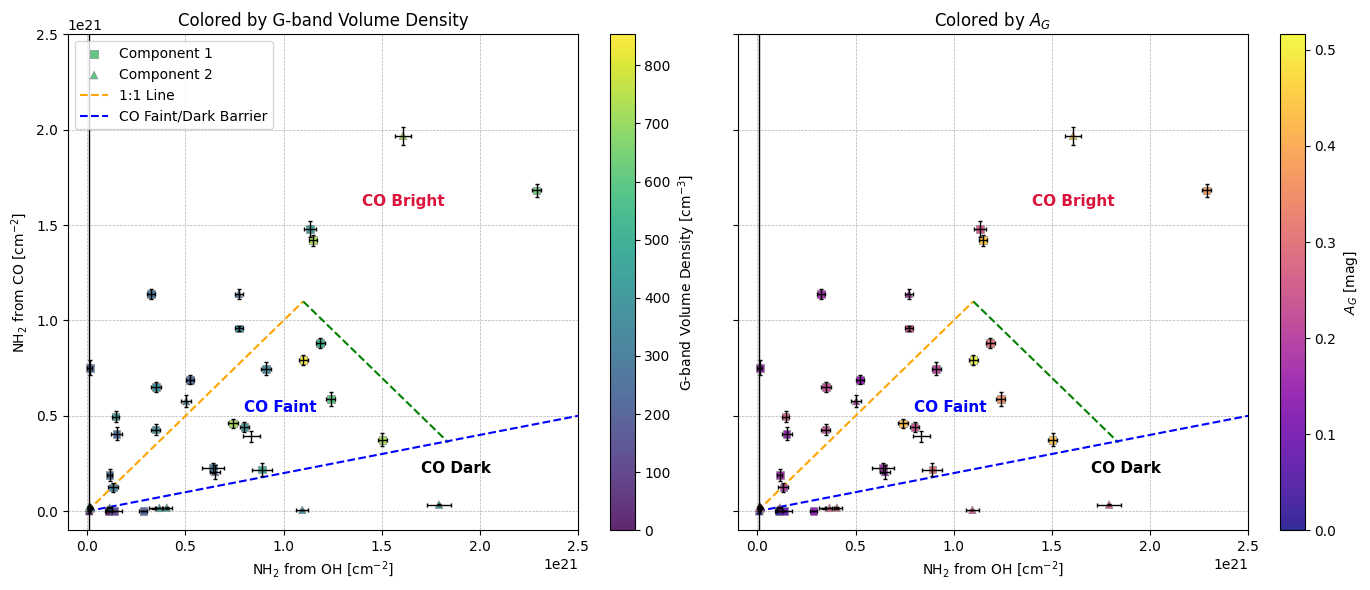

26
22


In [18]:
# --- Constants (same as yours) ---
XCO   = 2e20                         # [cm^-2 (K km/s)^-1]
C1667 = 2.3e14                       # [cm^-2 / (K km/s)]
Tex   = 5                            # [K]
Tc    = 3

# ---------- COMPONENT 1 ----------
filtered_df1 = merged_df_E23[merged_df_E23['comp'] == 1]

OH67_df1 = filtered_df1[filtered_df1['line'] == '67'].copy()
CO_df1   = filtered_df1[filtered_df1['line'] == 'CO'].copy()

OH67_df1['NOH']        = NOHfinder(Tex, Tc, OH67_df1['integral'])
OH67_df1['NH2_OH']     = NH2viaOH(OH67_df1['NOH'])
OH67_df1['NH2_OH_err'] = NH2viaOH(NOHfinder(Tex, Tc, OH67_df1['integral error']))
OH67_df1['component']  = 'Component 1'

CO_df1['NH2_CO']       = NH2viaCO(CO_df1['integral'])
CO_df1['NH2_CO_err']   = NH2viaCO(CO_df1['integral error'])
CO_df1['component']    = 'Component 1'

NH2_df1 = pd.merge(
    OH67_df1[['l [deg]', 'b [deg]', 'NH2_OH', 'NH2_OH_err',
              'G Band Volume Density [cm^-3]', 'Total A_G [mag]',
              'component', 'Distance to Peak', 'Upper Limit', 'Cloud']],
    CO_df1[['l [deg]', 'b [deg]', 'NH2_CO', 'NH2_CO_err']],
    on=['l [deg]', 'b [deg]'],
    how='inner'
)

# ---------- COMPONENT 2 ----------
filtered_df2 = merged_df_E23[merged_df_E23['comp'] == 2]

OH67_df2 = filtered_df2[filtered_df2['line'] == '67'].copy()
CO_df2   = filtered_df2[filtered_df2['line'] == 'CO'].copy()

OH67_df2['NOH']        = NOHfinder(Tex, Tc, OH67_df2['integral'])
OH67_df2['NH2_OH']     = NH2viaOH(OH67_df2['NOH'])
OH67_df2['NH2_OH_err'] = NH2viaOH(NOHfinder(Tex, Tc, OH67_df2['integral error']))
OH67_df2['component']  = 'Component 2'

CO_df2['NH2_CO']       = NH2viaCO(CO_df2['integral'])
CO_df2['NH2_CO_err']   = NH2viaCO(CO_df2['integral error'])
CO_df2['component']    = 'Component 2'

NH2_df2 = pd.merge(
    OH67_df2[['l [deg]', 'b [deg]', 'NH2_OH', 'NH2_OH_err',
              'G Band Volume Density [cm^-3]', 'Total A_G [mag]',
              'component', 'Distance to Peak', 'Upper Limit', 'Cloud']],
    CO_df2[['l [deg]', 'b [deg]', 'NH2_CO', 'NH2_CO_err']],
    on=['l [deg]', 'b [deg]'],
    how='inner'
)

# ---------- COMBINE BOTH ----------
NH2_df = pd.concat([NH2_df1, NH2_df2], ignore_index=True)

# Optional: ensure numeric for plotting
for c in ['NH2_OH','NH2_OH_err','NH2_CO','NH2_CO_err',
          'G Band Volume Density [cm^-3]','Total A_G [mag]']:
    NH2_df[c] = pd.to_numeric(NH2_df[c], errors='coerce')

# ---------- PLOT ----------
fig, axes = plt.subplots(ncols=2, figsize=(14, 6), sharex=True, sharey=True)

comp1 = NH2_df[NH2_df['component'] == 'Component 1']
comp2 = NH2_df[NH2_df['component'] == 'Component 2']

# ---------- PLOT 1: G-band Volume Density ----------
ax = axes[0]
sc1 = ax.scatter(
    comp1['NH2_OH'], comp1['NH2_CO'],
    c=comp1['G Band Volume Density [cm^-3]'], cmap='viridis',
    marker='s', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 1'
)
ax.scatter(
    comp2['NH2_OH'], comp2['NH2_CO'],
    c=comp2['G Band Volume Density [cm^-3]'], cmap='viridis',
    marker='^', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 2'
)
ax.errorbar(comp1['NH2_OH'], comp1['NH2_CO'], xerr=comp1['NH2_OH_err'], yerr=comp1['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)
ax.errorbar(comp2['NH2_OH'], comp2['NH2_CO'], xerr=comp2['NH2_OH_err'], yerr=comp2['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)

# 1:1 line and guide lines
ax.plot(np.linspace(0, 1.1e21), np.linspace(0, 1.1e21),
        ls='--', color='orange', label='1:1 Line', zorder=2)
x_vals    = np.linspace(0, 3e21, 100)
x_valsinv = np.linspace(1.1e21, 1.84e21, 100)
ax.plot(x_valsinv, -1 * (x_valsinv - 2.2e21), ls='--', color='green', zorder=2)
ax.plot(x_vals, 0.2 * x_vals, ls='--', color='blue', label='CO Faint/Dark Barrier', zorder=2)

ax.set_xlabel('NH$_2$ from OH [cm$^{-2}$]')
ax.set_ylabel('NH$_2$ from CO [cm$^{-2}$]')
ax.set_xlim([-0.1e21, 2.5e21])
ax.set_ylim([-0.1e21, 2.5e21])
ax.set_title('Colored by G-band Volume Density')
ax.grid(True, linestyle='--', linewidth=0.5, zorder=0)
cbar1 = fig.colorbar(sc1, ax=ax)
cbar1.set_label('G-band Volume Density [cm$^{-3}$]')
ax.legend()

# ---------- PLOT 2: Total A_G ----------
ax = axes[1]
sc2 = ax.scatter(
    comp1['NH2_OH'], comp1['NH2_CO'],
    c=comp1['Total A_G [mag]'], cmap='plasma',
    marker='s', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 1'
)
ax.scatter(
    comp2['NH2_OH'], comp2['NH2_CO'],
    c=comp2['Total A_G [mag]'], cmap='plasma',
    marker='^', s=30, edgecolors='gray', linewidths=0.5, alpha=0.85, zorder=3,
    label='Component 2'
)
ax.errorbar(comp1['NH2_OH'], comp1['NH2_CO'], xerr=comp1['NH2_OH_err'], yerr=comp1['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)
ax.errorbar(comp2['NH2_OH'], comp2['NH2_CO'], xerr=comp2['NH2_OH_err'], yerr=comp2['NH2_CO_err'],
            fmt='none', ecolor='black', elinewidth=1, capsize=1.5, zorder=4)

ax.plot(np.linspace(0, 1.1e21), np.linspace(0, 1.1e21),
        ls='--', color='orange', label='1:1 Line', zorder=2)
ax.plot(x_valsinv, -1 * (x_valsinv - 2.2e21), ls='--', color='green', zorder=2)
ax.plot(x_vals, 0.2 * x_vals, ls='--', color='blue', label='CO Faint/Dark Barrier', zorder=2)

ax.set_xlabel('NH$_2$ from OH [cm$^{-2}$]')
ax.set_title('Colored by $A_G$')
ax.grid(True, linestyle='--', linewidth=0.5, zorder=0)
cbar2 = fig.colorbar(sc2, ax=ax)
cbar2.set_label('$A_G$ [mag]')

for ax in axes:
    ax.text(1.4e21, 1.6e21, 'CO Bright', fontsize=11, color='crimson', weight='bold')
    ax.text(0.8e21, 0.52e21, 'CO Faint',  fontsize=11, color='blue',    weight='bold')
    ax.text(1.7e21, 0.2e21, 'CO Dark',    fontsize=11, color='black',   weight='bold')

plt.tight_layout()
plt.show()

print(len(comp1['NH2_OH']))
print(len(comp2['NH2_CO']))

In [20]:
def region_averages_by_cloud(df):
    """
    Prints mean values (with SEM) of NH2_OH, NH2_CO, 
    G-band volume density, and A_G for three regions (A/B/C)
    within each unique cloud in df.
    """

    # Work per cloud
    for cloud in df['Cloud'].dropna().unique():
        subdf = df[df['Cloud'] == cloud].copy()

        x = pd.to_numeric(subdf['NH2_OH'], errors='coerce')
        y = pd.to_numeric(subdf['NH2_CO'], errors='coerce')

        # ---------- REGION DEFINITIONS ----------
        regionA = ((y > x) | (y > (-x + 2.2e21)))             # CO-bright
        regionB = ((y <= x) & (y <= (-x + 2.2e21)) & (y >= 0.2 * x))  # CO-faint
        regionC = (y < 0.2 * x)                               # CO-dark

        regions = [regionA, regionB, regionC]
        region_names = [
            "Region A: Above green and orange lines - CO Bright",
            "Region B: Below green and orange, above blue - CO Faint",
            "Region C: Below blue line - CO Dark"
        ]

        print(f"\n--- Cloud: {cloud} ---")

        for mask, name in zip(regions, region_names):
            rsub = subdf[mask].copy()
            print(f"\n{name}")

            if len(rsub) == 0:
                print("  No points in this region.")
                continue

            n = len(rsub)

            # Means
            nh2_oh_mean = rsub['NH2_OH'].mean()
            nh2_co_mean = rsub['NH2_CO'].mean()
            gden_mean   = rsub['G Band Volume Density [cm^-3]'].mean()
            ag_mean     = rsub['Total A_G [mag]'].mean()

            # SEMs
            gden_sem = rsub['G Band Volume Density [cm^-3]'].std(ddof=1) / np.sqrt(n) if n > 1 else np.nan
            ag_sem   = rsub['Total A_G [mag]'].std(ddof=1) / np.sqrt(n) if n > 1 else np.nan

            print(f"  Number of points: {n}")
            print(f"  Mean NH2_OH: {nh2_oh_mean:.2e}")
            print(f"  Mean NH2_CO: {nh2_co_mean:.2e}")
            print(f"  Mean G-band Volume Density: {gden_mean:.2f} ± {gden_sem:.2f}")
            print(f"  Mean A_G: {ag_mean:.2f} ± {ag_sem:.2f}")

region_averages_by_cloud(NH2_df)



--- Cloud: Polaris ---

Region A: Above green and orange lines - CO Bright
  Number of points: 9
  Mean NH2_OH: 5.52e+20
  Mean NH2_CO: 7.20e+20
  Mean G-band Volume Density: 473.55 ± 60.81
  Mean A_G: 0.29 ± 0.04

Region B: Below green and orange, above blue - CO Faint
  Number of points: 8
  Mean NH2_OH: 8.90e+20
  Mean NH2_CO: 3.89e+20
  Mean G-band Volume Density: 449.65 ± 66.60
  Mean A_G: 0.27 ± 0.04

Region C: Below blue line - CO Dark
  Number of points: 6
  Mean NH2_OH: 6.71e+20
  Mean NH2_CO: 1.58e+19
  Mean G-band Volume Density: 355.75 ± 47.08
  Mean A_G: 0.22 ± 0.03

--- Cloud: Ursa Major ---

Region A: Above green and orange lines - CO Bright
  Number of points: 8
  Mean NH2_OH: 2.67e+20
  Mean NH2_CO: 5.99e+20
  Mean G-band Volume Density: 391.48 ± 69.70
  Mean A_G: 0.24 ± 0.04

Region B: Below green and orange, above blue - CO Faint
  Number of points: 4
  Mean NH2_OH: 4.98e+20
  Mean NH2_CO: 3.48e+20
  Mean G-band Volume Density: 654.30 ± 115.02
  Mean A_G: 0.40 ± 0.0